### <span style="color:orange">12.1 Preprocessing Images.</span>

#### <span style="color:orange">Importing the Libraries.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use("TkAgg")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

import random

## New
import pickle  # // to unpickle pickled files
import pandas as pd
from matplotlib.cm import get_cmap

#### <span style="color:orange">Loading/Opening the files</span>

In [2]:
np.random.seed(0)

with open('traffic-signs/train.p', 'rb') as file:
    train_data_file = pickle.load(file)

with open('traffic-signs/test.p', 'rb') as file:
    test_data_file = pickle.load(file)

with open("traffic-signs/valid.p", "rb") as file:
    validation_data_file = pickle.load(file)

print(type(train_data_file) )

## X_train, y_train, ...
train_images, train_labels = train_data_file["features"], train_data_file["labels"]
test_images, test_labels = test_data_file["features"], test_data_file["labels"]
validation_images, validation_labels = validation_data_file["features"],                                                                  validation_data_file["labels"]

<class 'dict'>


#### <span style="color:orange">Dataset Parameters.</span>

In [3]:
print(train_images.shape)
print(test_images.shape)
print(validation_images.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [4]:
print(train_labels.shape)

(34799,)


#### <span style="color:orange">assert method.</span>

In [5]:
assert (train_images.shape[0] == train_labels.shape[0] ),\
    "The number of images is not equal to the number of labels"
assert (validation_images.shape[0] == validation_labels.shape[0]), \
    "The number of images is not equal to the number of labels"
assert (test_images.shape[0] == test_labels.shape[0]),\
    "The number of images is not equal to the number of labels"

assert (train_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"
assert (validation_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"
assert (test_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"

#### <span style="color:orange">Using Pandas Library to read the csv file.</span>

In [6]:
dataset = pd.read_csv('traffic-signs/signnames.csv')

print("Dataset = \n", dataset)

Dataset = 
     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                

#### <span style="color:orange">Plotting Samples of the Traffic data (from (10.1) MNIST for clarification).</span>

C:\Users\hp\AppData\Local\Temp\ipykernel_11300\2515904116.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


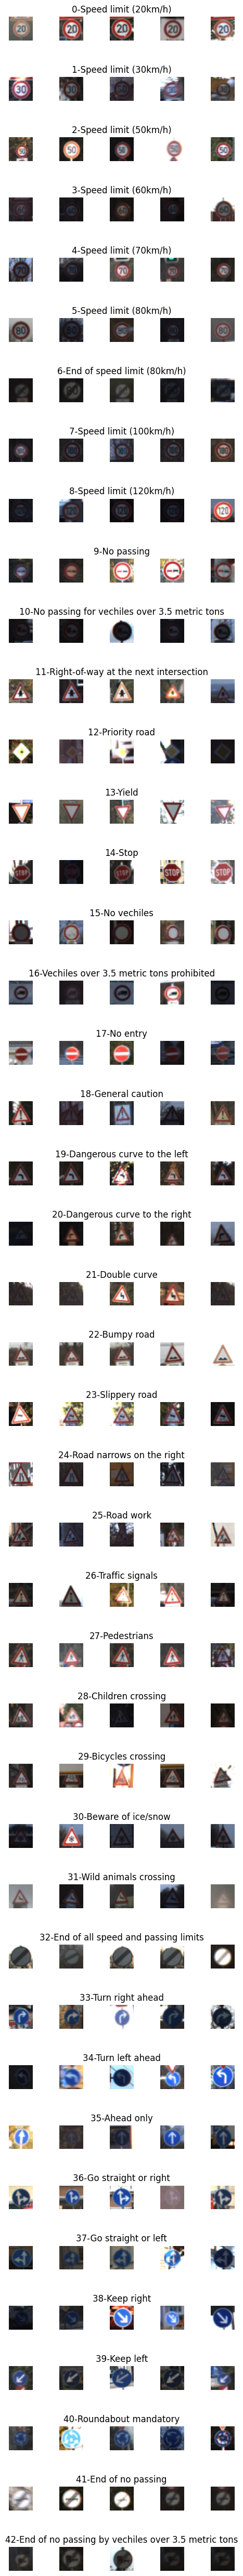

In [7]:
number_of_samples = []
number_of_classes = 43
cols = 5

fig, axes = plt.subplots(nrows=number_of_classes, ncols=cols, figsize=(5, 50),
                         layout='constrained')
# // figsize is the size of each grid (subplot), first the width then the height\

# fig.subplots_adjust( left=None, bottom=None,  right=None, top=None, wspace=None, hspace=None)

fig.tight_layout()
# // this is used to automatically deal with overlapping and separates the figures/subplots better

for col in range(cols): # // each col of the 5
    for r_index, row_info in dataset.iterrows(): # // each row(class) of the 10
        image_selected = train_images[train_labels == r_index]

        axes[r_index][col].imshow(image_selected[random.randint(0, (len(image_selected) - 1) ), : , : ],
                          cmap=plt.get_cmap("gray") )
        axes[r_index][col].axis("off")

        if col == 2:
            axes[r_index][col].set_title(str(r_index) + "-" + row_info["SignName"])

            number_of_samples.append(len(image_selected) )

#### <span style="color:orange">Bar plot to show the number of images each Class has.</span>

In [11]:
print(number_of_samples)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


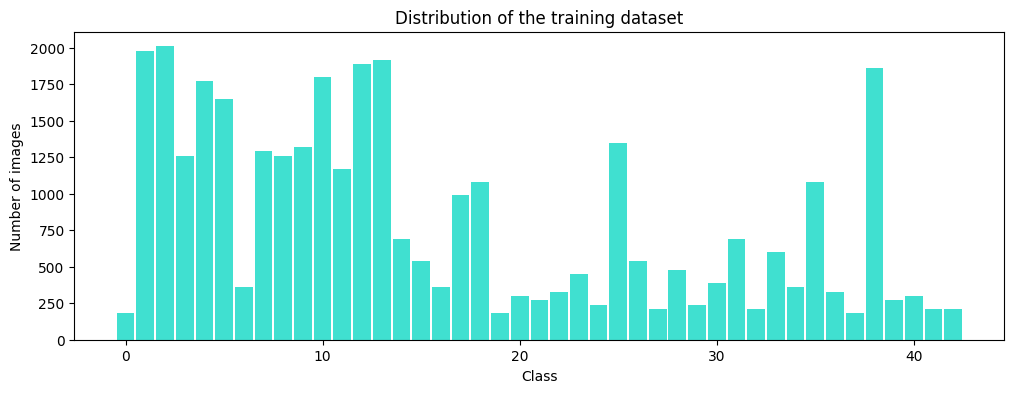

In [10]:
plt.figure(figsize=(12, 4) )
plt.bar(range(0, number_of_classes), number_of_samples, color="turquoise", width=0.9)
plt.title('Distribution of the training dataset')
plt.xlabel('Class')
plt.ylabel('Number of images')

plt.show()

#### <span style="color:orange">Preprocessing the images.</span>

**We will focus on a random photo then apply the same to the rest.**

In [12]:
import cv2

In [14]:
# random_image = cv2.imread(train_images[1000] )
# cv2.imshow("Random Image", random_image)
# cv2.waitKey(0)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


**Error: Expected 'filename' to be a str or path-like object**

**That's why we will use plt.imshow() instead**

Image shape: (32, 32, 3)
Label of the pic: 36


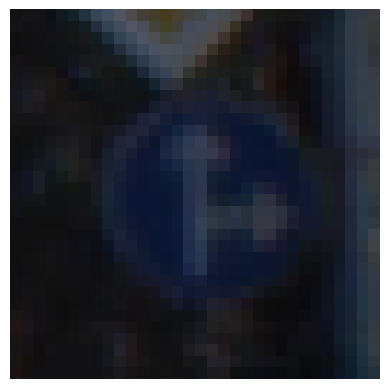

In [19]:
plt.imshow(train_images[1000])
plt.axis('off')
print("Image shape:", train_images[1000].shape)
print("Label of the pic:" , train_labels[1000] )

##### <span style="color:orange">1. grayscale</span>

In [20]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

Image shape: (32, 32)


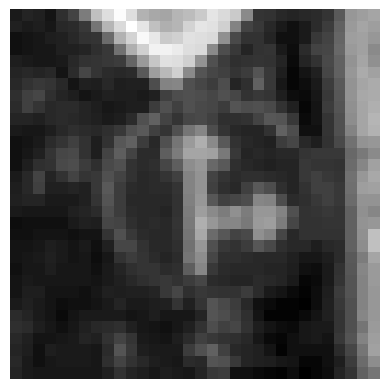

In [29]:
random_image = grayscale(train_images[1000] )

plt.imshow(random_image, cmap=plt.get_cmap("gray") )
plt.axis('off')
print("Image shape:", random_image.shape)

##### <span style="color:orange">2. Histogram Equalization</span>

In [28]:
def histogram_equalize(img):
    cv2.equalizeHist(img)
    return img

(32, 32)


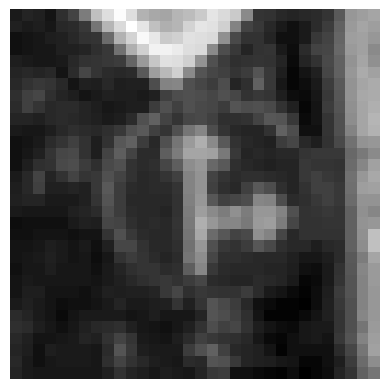

In [30]:
random_image = histogram_equalize(random_image)
plt.imshow(random_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
print(random_image.shape)

##### <span style="color:orange">3. Normalization</span>

In [31]:
def preprocessing_image(img):
    img = grayscale(img)
    img = histogram_equalize(img)
    img = img / 255
    return img

In [33]:
train_images_preprocessed = np.array(list(map(preprocessing_image, train_images) ) )
validation_images_preprocessed = np.array(list(map(preprocessing_image, validation_images) ) )
test_images_preprocessed = np.array(list(map(preprocessing_image, test_images) ) )

(-0.5, 31.5, 31.5, -0.5)

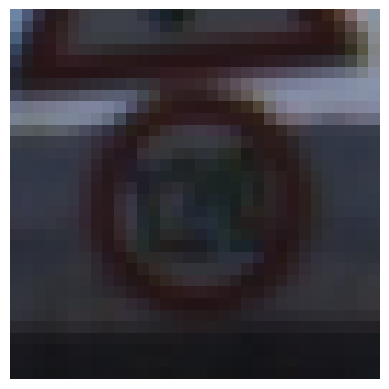

In [37]:
random_index = random.randint(0, len(train_images) - 1)

random_image = plt.imshow(train_images[random_index] )
plt.axis('off')

train images preprocessed shape:  (34799, 32, 32)


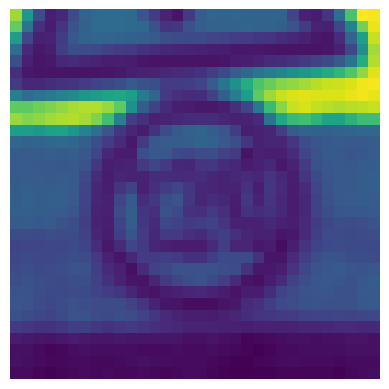

In [38]:
random_image_preprocessed = plt.imshow(train_images_preprocessed[random_index] )
plt.axis('off')
print("train images preprocessed shape: ", train_images_preprocessed.shape)

##### <span style="color:orange">4. Reshaping</span>

In [39]:
train_images_preprocessed = train_images_preprocessed.reshape(34799, 32, 32, 1)
test_images_preprocessed = test_images_preprocessed.reshape(12630, 32, 32, 1)
validation_images_preprocessed = validation_images_preprocessed.reshape(4410, 32, 32, 1)

##### <span style="color:orange">5. One Hot Encoding</span>

In [40]:
train_labels = to_categorical(train_labels, num_classes=43)
test_labels = to_categorical(test_labels, num_classes=43)
validation_labels = to_categorical(validation_labels, num_classes=43)

___